## 1. Import relevant libraries and load dataset.

In [1]:
# import libraries
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.feature_selection import RFE
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from IPython.display import Image
import seaborn as sns
import pickle
from prettytable import PrettyTable

In [2]:
# load preprocessed_train.csv into pandas dataframe
train_df = pd.read_csv("preprocessed_train.csv")
# print the first 5 rows
train_df.head()

,id,target,0,1,2,3,4,5,6,7,...,inversetangent,hyperbolicsine,hyperboliccosine,hyperbolictangent,exponential,exponentialm1,exponential2,poweroftwo,powerofthree,poweroffour
0,0,1.0,-0.098,2.165,0.681,-0.614,1.309,-0.455,-0.236,0.276,...,-0.010571,-0.004502,1.765149,-0.010765,1.760647,0.760647,1.315869,1.182425,0.015243,3.584848
1,1,0.0,1.081,-0.973,-0.383,0.326,-0.428,0.317,1.172,0.352,...,0.067941,0.089790,1.622502,0.065681,1.712292,0.712292,1.324817,0.976056,0.047272,2.766570
2,2,1.0,-0.523,-0.089,-0.348,0.148,-0.022,0.404,-0.023,-0.172,...,0.006444,0.086690,1.662417,0.002687,1.749107,0.749107,1.313960,1.023024,0.266454,3.092631
3,3,1.0,0.067,-0.021,0.392,-1.637,-0.446,-0.725,-1.035,0.834,...,0.057935,0.180076,1.572025,0.053542,1.752101,0.752101,1.326229,0.887980,0.371308,2.553467
4,4,1.0,2.347,-0.831,0.511,-0.021,1.225,1.594,0.585,1.509,...,0.076936,0.277209,1.584532,0.068240,1.861741,0.861741,1.377569,0.901115,0.613952,2.671541


In [3]:
# load preprocessed_test.csv into pandas dataframe
test_df = pd.read_csv("preprocessed_test.csv")
# print the first 5 rows
test_df.head()

,id,0,1,2,3,4,5,6,7,8,...,inversetangent,hyperbolicsine,hyperboliccosine,hyperbolictangent,exponential,exponentialm1,exponential2,poweroftwo,powerofthree,poweroffour
0,250,0.500,-1.033,-1.595,0.309,-0.714,0.502,0.535,-0.129,-0.687,...,0.103791,0.264990,1.639407,0.097112,1.904397,0.904397,1.404195,0.985912,0.477020,2.913247
1,251,0.776,0.914,-0.494,1.347,-0.867,0.480,0.578,-0.313,0.203,...,-0.021779,-0.065305,1.707521,-0.020326,1.642217,0.642217,1.265487,1.094274,-0.128315,3.281111
2,252,1.750,0.509,-0.057,0.835,-0.476,1.428,-0.701,-2.009,-1.378,...,-0.025656,-0.131476,1.649251,-0.022351,1.517775,0.517775,1.214393,0.994294,-0.330590,3.062801
3,253,-0.556,-1.855,-0.682,0.578,1.592,0.512,-1.419,0.722,0.511,...,0.001523,-0.022843,1.589608,0.003396,1.566765,0.566765,1.243412,0.956136,-0.076546,2.382968
4,254,0.754,-0.245,1.173,-1.623,0.009,0.370,0.781,-1.763,-1.432,...,0.071672,0.195819,1.653205,0.064720,1.849024,0.849024,1.374870,0.988710,0.371320,3.079160


In [4]:
# how many datapoints and features present in train and test dataset
print("Training Dataset:",train_df.shape)
print("Test Dataset    :",test_df.shape)

Training Dataset: (250, 322)
Test Dataset    : (19750, 321)


In [5]:
y_train = train_df["target"].values # store values of feature "target"
X_train = train_df.drop(["id","target"],axis=1) # drop id and class label from the dataset
print("Size of class label :",len(y_train))
print("Class Label         :")
print(y_train)
print()
print("Number of data points belonging to each class label: ")
print(train_df["target"].value_counts())
print()
print("Number of rows and columns in train dataset:",X_train.shape)
print("Train Dataset in tabular format            :")
X_train.head(2)

Size of class label : 250
Class Label         :
[1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 0. 0. 1. 1. 0. 1. 1. 1. 1. 0. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 0. 1. 1. 1. 1.
 0. 0. 1. 1. 0. 1. 0. 1. 0. 1. 0. 0. 1. 1. 0. 0. 0. 1. 0. 1. 1. 1. 0. 1.
 1. 1. 1. 0. 1. 1. 0. 1. 1. 0. 0. 1. 1. 1. 0. 1. 1. 1. 1. 0. 1. 1. 1. 1.
 0. 1. 1. 1. 1. 0. 0. 1. 0. 1. 1. 0. 0. 1. 1. 1. 1. 1. 0. 1. 1. 0. 0. 1.
 0. 1. 0. 1. 0. 1. 0. 0. 0. 1. 1. 1. 1. 1. 0. 1. 0. 1. 1. 0. 1. 0. 1. 0.
 1. 1. 1. 1. 0. 1. 0. 1. 1. 0. 0. 1. 1. 0. 0. 1. 1. 0. 1. 1. 0. 1. 1. 1.
 0. 0. 0. 0. 0. 1. 1. 1. 1. 0. 0. 1. 1. 0. 0. 0. 1. 1. 1. 1. 1. 0. 1. 1.
 1. 0. 0. 1. 1. 1. 0. 1. 1. 0. 1. 1. 1. 0. 1. 0. 1. 0. 0. 0. 0. 1. 1. 0.
 1. 1. 0. 1. 1. 1. 1. 1. 1. 0. 1. 0. 0. 1. 1. 1. 1. 0. 0. 1. 1. 1. 1. 0.
 0. 1. 1. 0. 0. 0. 0. 0. 1. 0.]

Number of data points belonging to each class label: 
1.0    160
0.0     90
Name: target, dtype: int64

Number of rows and columns in train dataset: (250, 320)
Train Dataset in tabular form

,0,1,2,3,4,5,6,7,8,9,...,inversetangent,hyperbolicsine,hyperboliccosine,hyperbolictangent,exponential,exponentialm1,exponential2,poweroftwo,powerofthree,poweroffour
0,-0.098,2.165,0.681,-0.614,1.309,-0.455,-0.236,0.276,-2.246,1.825,...,-0.010571,-0.004502,1.765149,-0.010765,1.760647,0.760647,1.315869,1.182425,0.015243,3.584848
1,1.081,-0.973,-0.383,0.326,-0.428,0.317,1.172,0.352,0.004,-0.291,...,0.067941,0.089790,1.622502,0.065681,1.712292,0.712292,1.324817,0.976056,0.047272,2.766570


## 2. PCA For Dimensionality Reduction

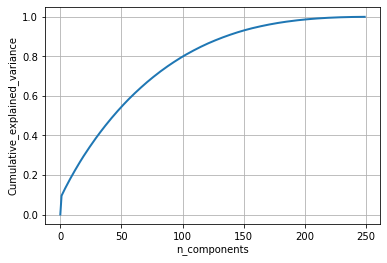

In [6]:
# Reference: https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html
# Dimensionality reduction using PCA
n = X_train.shape[0]
cum_var_explained = list()
for i in range(n):
    pca = PCA(n_components=i)
    pca.fit(X_train,y_train)
    cum_var_explained.append(np.sum(pca.explained_variance_ratio_))
    
# Plot the TruncatedSVD spectrum
plt.figure(1, figsize=(6, 4))

plt.clf()
plt.plot(cum_var_explained, linewidth=2)
plt.axis('tight')
plt.grid()
plt.xlabel('n_components')
plt.ylabel('Cumulative_explained_variance')
plt.show()

Observations: If we take 200 dimensions, approximately 99% of variance is explained.

## 3. Data Scaling

In [7]:
# Reference: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html
# Standardize train features by removing the mean and scaling to unit variance.
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_train = pd.DataFrame(X_train)
# print the first 5 rows
X_train.head()

,0,1,2,3,4,5,6,7,8,9,...,310,311,312,313,314,315,316,317,318,319
0,-0.121736,2.176002,0.503692,-0.609972,1.265232,-0.469388,-0.266814,0.210682,-2.296917,1.758518,...,-0.244802,-0.025449,1.662065,-0.267116,0.881744,0.881744,0.740246,2.215470,0.079806,1.055914
1,1.061577,-0.939278,-0.539790,0.320974,-0.415729,0.340017,1.134681,0.291718,0.042547,-0.320787,...,1.649698,0.822779,-0.404664,1.702451,0.500674,0.500674,0.890818,-0.354507,0.214521,-0.419912
2,-0.548290,-0.061678,-0.505465,0.144689,-0.022827,0.431232,-0.054798,-0.267006,0.180835,0.144993,...,0.165774,0.794897,0.173637,0.079461,0.790801,0.790801,0.708132,0.230399,1.136412,0.168163
3,0.043868,0.005829,0.220265,-1.623118,-0.433148,-0.752470,-1.062122,0.805660,0.561388,0.234415,...,1.408268,1.634976,-1.136002,1.389716,0.814392,0.814392,0.914581,-1.451333,1.577432,-0.804260
4,2.332208,-0.798306,0.336970,-0.022683,1.183942,1.678890,0.550393,1.525391,0.025911,2.125050,...,1.866754,2.508765,-0.954792,1.768380,1.678423,1.678423,1.778434,-1.287762,2.598002,-0.591304


In [8]:
# Reference: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html
# Standardize test features by removing the mean and scaling to unit variance.
test = test_df.drop("id",axis=1) 
test = scaler.transform(test)
test = pd.DataFrame(test)
# print the first 5 rows
test.head()

,0,1,2,3,4,5,6,7,8,9,...,310,311,312,313,314,315,316,317,318,319
0,0.478452,-0.998843,-1.728417,0.304138,-0.692502,0.533981,0.500624,-0.221157,-0.675928,1.233779,...,2.514771,2.398846,-0.159734,2.512255,2.014582,2.014582,2.226446,-0.231760,2.022061,-0.155368
1,0.755461,0.934060,-0.648649,1.332140,-0.840565,0.510915,0.543426,-0.417350,0.249460,1.297652,...,-0.515238,-0.572419,0.827132,-0.513452,-0.051560,-0.051560,-0.107488,1.117693,-0.524004,0.508102
2,1.733024,0.531992,-0.220077,0.825072,-0.462180,1.504847,-0.729665,-2.225742,-1.394404,0.129271,...,-0.608789,-1.167685,-0.017111,-0.565623,-1.032236,-1.032236,-0.967202,-0.127379,-1.374781,0.114362
3,-0.581411,-1.814892,-0.833024,0.570547,1.539102,0.544465,-1.444348,0.686238,0.569706,0.522334,...,0.047048,-0.190439,-0.881250,0.097728,-0.646164,-0.646164,-0.478917,-0.602568,-0.306260,-1.111767
4,0.733381,-0.216549,0.986204,-1.609253,0.007173,0.395585,0.745488,-1.963439,-1.450551,-0.948706,...,1.739726,1.776601,0.040165,1.677692,1.578206,1.578206,1.733010,-0.196915,1.577482,0.143868


## 4. Cross Validation and Hyper parameter Tuning

In [10]:
# Reference: https://towardsdatascience.com/how-to-train-test-split-kfold-vs-stratifiedkfold-281767b93869
# Reference: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RepeatedStratifiedKFold.html#
# Reference: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html
# perform StratifiedKFold Cross Validation and Hyperparameter Tuning using GridSearchCV
def CrossValidationandHyperparameterTuning(model,hyperparameters):
    """
    This function performs StratifiedKFold Cross Validation and Hyperparameter Tuning using GridSearchCV.
    Parameters     
    model          : instance of model
    hyperparameters: dictionary of hyperparameters
    Returns   
    clf            : fitted model
    """
    kfold = RepeatedStratifiedKFold(n_splits=10,n_repeats=10)
    # create GridSearchCV object
    clf = GridSearchCV(model,hyperparameters,scoring="roc_auc",n_jobs=-1,cv=kfold,verbose=0,return_train_score=True)
    # fit model using GridSearchCV
    clf = clf.fit(X_train,y_train)
    return clf

# 5. Hyper parameter vs AUC Plot

In [11]:
def HyperparameterVSAucPlot(results,param):
    """
    Plot of Hyper parameter vs AUC of each model
    Parameters     
    results   : instance of model
    params    : list of hyper parameters
    Returns   
    plot of Hyper Parameter vs AUC
    """
    train_auc = results["mean_train_score"]
    train_auc_std = results["std_train_score"]
    cv_auc = results["mean_test_score"]
    cv_auc_std = results["std_test_score"]
    a = results[param]
    plt.figure(figsize=(10,5))
    plt.plot(a,train_auc,label="Train AUC")
    plt.plot(a,cv_auc,label="Validation AUC")
    plt.title("Hyper Parameter vs AUC")
    plt.xlabel("Hyper Parameter")
    plt.ylabel("Area under ROC curve")
    plt.legend()
    plt.grid()
    plt.show()

## 6. Apply ML Models

### 6.1 Logistic Regression

In [11]:
# Reference: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html
# import LogisticRegression
from sklearn.linear_model import LogisticRegression
# dictionary of hyper parameters
parameters = {"C":[0.0001,0.001,0.01,0.1,1,10,100,1000,10000]}
# insance of LogisticRegression model
clf = LogisticRegression()
# call CrossValidationandHyperparameterTuning function
logreg_clf = CrossValidationandHyperparameterTuning(clf,parameters)

In [12]:
# dictionary of all the evaluation metrics from the gridsearch
logreg_results = pd.DataFrame.from_dict(logreg_clf.cv_results_)
# sort logreg_results based on param_C
logreg_results = logreg_results.sort_values(["param_C"])
print("Shape of Resultant Dataset:",logreg_results.shape)
logreg_results.head()

Shape of Resultant Dataset: (9, 211)


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,split92_train_score,split93_train_score,split94_train_score,split95_train_score,split96_train_score,split97_train_score,split98_train_score,split99_train_score,mean_train_score,std_train_score
0,0.018480,0.005941,0.008919,0.006186,0.0001,{'C': 0.0001},0.729167,0.777778,0.687500,0.548611,...,0.929441,0.933728,0.918724,0.921125,0.932099,0.945045,0.940758,0.914695,0.930010,0.009589
1,0.018835,0.007463,0.008311,0.004887,0.001,{'C': 0.001},0.736111,0.763889,0.722222,0.611111,...,0.968621,0.965706,0.963049,0.963049,0.968707,0.978995,0.972394,0.953361,0.967418,0.006024
2,0.018680,0.004540,0.007838,0.003636,0.01,{'C': 0.01},0.701389,0.777778,0.777778,0.736111,...,0.999486,0.999314,0.999486,0.999400,0.998971,0.999829,0.999486,0.999228,0.999413,0.000329
3,0.023829,0.005178,0.007621,0.002000,0.1,{'C': 0.1},0.687500,0.791667,0.805556,0.819444,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
4,0.032170,0.006518,0.008411,0.002164,1,{'C': 1},0.673611,0.812500,0.826389,0.819444,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000


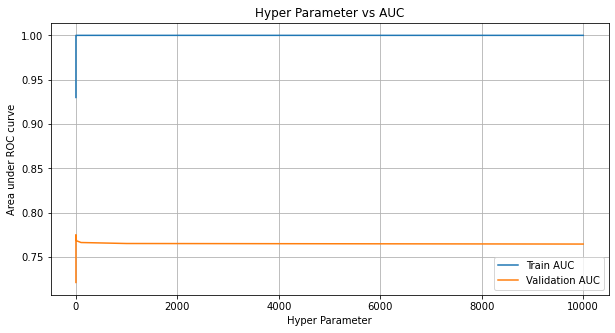

In [13]:
# plot Hyper parameter vs AUC
HyperparameterVSAucPlot(logreg_results,"param_C")

In [14]:
# print best parameters
# here we are choosing the best C
best_params = logreg_clf.best_params_
print("For LogisticRegression Model")
print("Best parameters:",best_params)

For LogisticRegression Model
Best parameters: {'C': 0.1}


In [15]:
# Reference: https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.RFE.html
# fit model on training data
logreg_clf = LogisticRegression(C=best_params["C"])
logreg_clf.fit(X_train,y_train)
# fit and feature ranking with recursive feature elimination.
logreg = RFE(logreg_clf,n_features_to_select=200)
logreg.fit(X_train,y_train)
target = logreg.predict_proba(test)

In [16]:
# Kaggle Submission Score 
logreg_id = test_df['id']
logreg_target = target[:,1]
logreg_df = pd.DataFrame(np.column_stack((logreg_id,logreg_target)), columns=['id','target'])
logreg_df['id'] = logreg_df['id'].astype('int32')
logreg_df.to_csv('logisticregression.csv', index=False)

Kaggle Score For Logistic Regression Submission


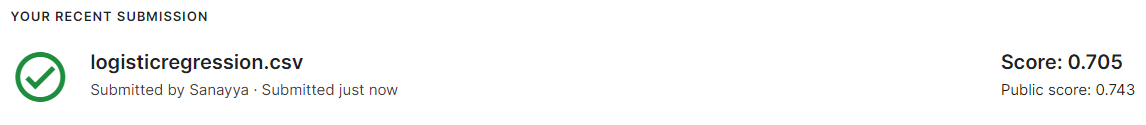

In [17]:
print("Kaggle Score For Logistic Regression Submission")
Image('./logisticregression.png',width=800,height=100)

### 6.2 Random Forest

In [18]:
# Reference: https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html#
# import Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
# dictionary of hyper parameters
parameters = {'n_estimators': [50,100,150,200,250,300,350,400,450,500],'max_depth': [2,3,5,7]}
# insance of RandomForestClassifier model
clf = RandomForestClassifier()
# call CrossValidationandHyperparameterTuning function
rfc_clf = CrossValidationandHyperparameterTuning(clf,parameters)

In [19]:
# dictionary of all the evaluation metrics from the gridsearch
rfc_results = pd.DataFrame.from_dict(rfc_clf.cv_results_)
print("Shape of Resultant Dataset:",rfc_results.shape)
rfc_results.head()

Shape of Resultant Dataset: (40, 212)


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,...,split92_train_score,split93_train_score,split94_train_score,split95_train_score,split96_train_score,split97_train_score,split98_train_score,split99_train_score,mean_train_score,std_train_score
0,0.141378,0.018376,0.013991,0.002969,2,50,"{'max_depth': 2, 'n_estimators': 50}",0.694444,0.694444,0.583333,...,0.984225,0.993141,0.990998,0.992370,0.991169,0.994427,0.991255,0.987997,0.990508,0.005284
1,0.269507,0.045256,0.020285,0.006019,2,100,"{'max_depth': 2, 'n_estimators': 100}",0.826389,0.659722,0.513889,...,0.999057,0.996485,0.999829,0.994599,0.998628,0.998371,0.997257,0.996571,0.997603,0.001881
2,0.371787,0.018034,0.025459,0.004531,2,150,"{'max_depth': 2, 'n_estimators': 150}",0.791667,0.597222,0.715278,...,0.999400,0.998543,0.999228,0.998800,0.998457,1.000000,0.999228,0.998200,0.998690,0.001311
3,0.481219,0.011944,0.030516,0.003102,2,200,"{'max_depth': 2, 'n_estimators': 200}",0.840278,0.625000,0.458333,...,0.999657,0.998628,1.000000,0.999829,1.000000,1.000000,1.000000,0.999400,0.999298,0.000937
4,0.619705,0.022760,0.036571,0.003585,2,250,"{'max_depth': 2, 'n_estimators': 250}",0.826389,0.701389,0.395833,...,0.999914,0.999914,1.000000,0.999571,1.000000,1.000000,0.999657,0.999914,0.999449,0.000697


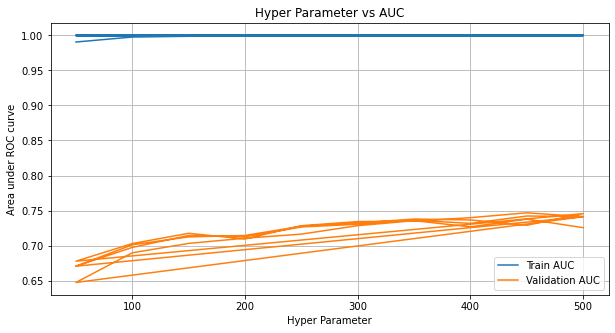

In [20]:
# plot Hyper parameter vs AUC
HyperparameterVSAucPlot(rfc_results,"param_n_estimators")

In [21]:
# print best parameters
# here we are choosing the best var_smoothing
best_params = rfc_clf.best_params_
print("For Random Forest Classifier Model")
print("Best parameters:",best_params)

For Random Forest Classifier Model
Best parameters: {'max_depth': 5, 'n_estimators': 450}


In [22]:
# Reference: https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.RFE.html
# fit model on training data
rfc_clf = RandomForestClassifier(max_depth=best_params["max_depth"],n_estimators=best_params["n_estimators"])
rfc_clf.fit(X_train,y_train)
# fit and feature ranking with recursive feature elimination.
rfc = RFE(rfc_clf,n_features_to_select=200)
rfc.fit(X_train,y_train)
target = rfc.predict_proba(test)

In [23]:
# Kaggle Submission Score 
rfc_id = test_df['id']
rfc_target = target[:,1]
rfc_df = pd.DataFrame(np.column_stack((rfc_id,rfc_target)), columns=['id','target'])
rfc_df['id'] = rfc_df['id'].astype('int32')
rfc_df.to_csv('randomforestclassifier.csv', index=False)

Kaggle Score For Gaussian Naive Bayes Submission


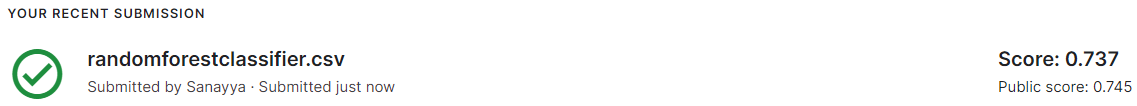

In [24]:
print("Kaggle Score For Gaussian Naive Bayes Submission")
Image('./randomforestclassifier.png',width=800,height=100)

### 6.3 LGBM

In [25]:
# Reference: https://lightgbm.readthedocs.io/en/latest/pythonapi/lightgbm.LGBMClassifier.html
# import LGBM Classifier
from lightgbm import LGBMClassifier 
# dictionary of hyper parameters
parameters = {'n_estimators': [3,5,11,25,45,55,85,101],'learning_rate': [0.001,0.01,0.1,1]}
# insance of LGBMClassifier model
clf = LGBMClassifier()
# call CrossValidationandHyperparameterTuning function
lgbm_clf = CrossValidationandHyperparameterTuning(clf,parameters)

In [26]:
# dictionary of all the evaluation metrics from the gridsearch
lgbm_results = pd.DataFrame.from_dict(lgbm_clf.cv_results_)
print("Shape of Resultant Dataset:",lgbm_results.shape)
lgbm_results.head()

Shape of Resultant Dataset: (32, 212)


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_rate,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,...,split92_train_score,split93_train_score,split94_train_score,split95_train_score,split96_train_score,split97_train_score,split98_train_score,split99_train_score,mean_train_score,std_train_score
0,0.101644,0.015660,0.010173,0.003996,0.001,3,"{'learning_rate': 0.001, 'n_estimators': 3}",0.684028,0.725694,0.684028,...,0.852623,0.852666,0.876286,0.862011,0.880144,0.88083,0.905821,0.884002,0.881966,0.015895
1,0.124856,0.020471,0.012027,0.005344,0.001,5,"{'learning_rate': 0.001, 'n_estimators': 5}",0.697917,0.725694,0.684028,...,0.852623,0.852581,0.876029,0.862011,0.880187,0.88083,0.913623,0.884002,0.882866,0.015981
2,0.196123,0.037705,0.013416,0.005050,0.001,11,"{'learning_rate': 0.001, 'n_estimators': 11}",0.645833,0.725694,0.684028,...,0.852623,0.853952,0.876286,0.862011,0.880187,0.88083,0.912337,0.884002,0.885757,0.017382
3,0.335806,0.041593,0.014113,0.004411,0.001,25,"{'learning_rate': 0.001, 'n_estimators': 25}",0.645833,0.711806,0.684028,...,0.875643,0.853952,0.883702,0.862011,0.887474,0.88083,0.913280,0.883145,0.892401,0.017504
4,0.557517,0.068649,0.014420,0.003293,0.001,45,"{'learning_rate': 0.001, 'n_estimators': 45}",0.628472,0.697917,0.677083,...,0.900592,0.872857,0.895962,0.862011,0.912766,0.88083,0.929270,0.927083,0.900978,0.017708


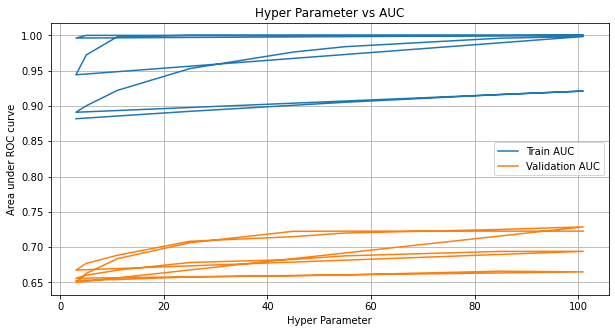

In [27]:
# plot Hyper parameter vs AUC
HyperparameterVSAucPlot(lgbm_results,"param_n_estimators")

In [28]:
# print best parameters
# here we are choosing the best n_estimators and max_depth
best_params = lgbm_clf.best_params_
print("For LGBM Classifier Model")
print("Best parameters:",best_params)

For LGBM Classifier Model
Best parameters: {'learning_rate': 0.1, 'n_estimators': 101}


In [30]:
# Reference: https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.RFE.html
# fit model on training data
lgbm_clf = LGBMClassifier(learning_rate=best_params["learning_rate"],n_estimators=best_params["n_estimators"])
lgbm_clf.fit(X_train,y_train)
# fit and feature ranking with recursive feature elimination.
lgbm = RFE(lgbm_clf,n_features_to_select=200)
lgbm.fit(X_train,y_train)
target = lgbm.predict_proba(test)

In [31]:
# Kaggle Submission Score 
lgbm_id = test_df['id']
lgbm_target = target[:,1]
lgbm_df = pd.DataFrame(np.column_stack((lgbm_id,lgbm_target)), columns=['id','target'])
lgbm_df['id'] = lgbm_df['id'].astype('int32')
lgbm_df.to_csv('lgbm.csv', index=False)

Kaggle Score For LGBM Submission


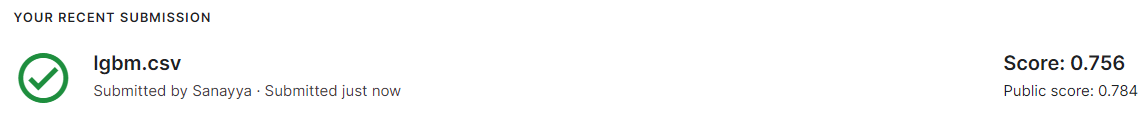

In [33]:
print("Kaggle Score For LGBM Submission")
Image('./lgbm.png',width=800,height=100)

### 6.4 xgboost

In [34]:
# Reference: https://xgboost.readthedocs.io/en/latest/python/python_api.html
# import xgboost
from xgboost import XGBClassifier 
# dictionary of hyper parameters
parameters = {'n_estimators': [50,100,150,200,250,300,350,400,450,500],'max_depth': [2,3,5,7]}
# insance of XGBClassifier model
clf = XGBClassifier()
# call CrossValidationandHyperparameterTuning function
xgb_clf = CrossValidationandHyperparameterTuning(clf,parameters)

[19:32:49] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [35]:
# dictionary of all the evaluation metrics from the gridsearch
xgb_results = pd.DataFrame.from_dict(xgb_clf.cv_results_)
print("Shape of Resultant Dataset:",xgb_results.shape)
xgb_results.head()

Shape of Resultant Dataset: (40, 212)


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,...,split92_train_score,split93_train_score,split94_train_score,split95_train_score,split96_train_score,split97_train_score,split98_train_score,split99_train_score,mean_train_score,std_train_score
0,0.593512,0.058444,0.013334,0.002166,2,50,"{'max_depth': 2, 'n_estimators': 50}",0.763889,0.666667,0.715278,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0
1,0.961790,0.041909,0.012923,0.000977,2,100,"{'max_depth': 2, 'n_estimators': 100}",0.826389,0.736111,0.729167,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0
2,1.228253,0.054138,0.013428,0.000934,2,150,"{'max_depth': 2, 'n_estimators': 150}",0.854167,0.763889,0.756944,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0
3,1.507112,0.106761,0.013366,0.000734,2,200,"{'max_depth': 2, 'n_estimators': 200}",0.840278,0.784722,0.763889,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0
4,1.720380,0.117332,0.012984,0.000683,2,250,"{'max_depth': 2, 'n_estimators': 250}",0.847222,0.798611,0.763889,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0


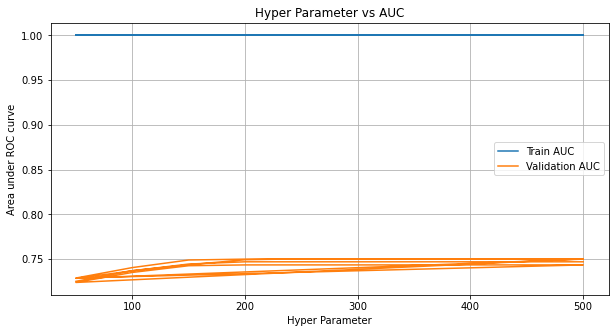

In [36]:
# plot Hyper parameter vs AUC
HyperparameterVSAucPlot(xgb_results,"param_n_estimators")

In [37]:
# print best parameters
# here we are choosing the best n_estimators and max_depth
best_params = xgb_clf.best_params_
print("For Random Forest Classifier Model")
print("Best parameters:",best_params)

For Random Forest Classifier Model
Best parameters: {'max_depth': 2, 'n_estimators': 250}


In [39]:
# Reference: https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.RFE.html
# fit and calibrate model on training data
xgb_clf = XGBClassifier(max_depth=best_params["max_depth"],n_estimators=best_params["n_estimators"])
xgb_clf.fit(X_train,y_train)
# fit and feature ranking with recursive feature elimination.
xgb = RFE(xgb_clf,n_features_to_select=200)
xgb.fit(X_train,y_train)
target = xgb.predict_proba(test)

[19:33:43] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[19:33:43] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[19:33:44] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[19:33:44] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[19:33:50] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[19:33:51] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[19:33:51] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[19:33:51] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[19:33:57] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[19:33:57] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[19:33:58] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[19:33:58] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[19:34:04] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[19:34:04] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[19:34:04] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[19:34:04] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[19:34:11] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[19:34:11] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[19:34:11] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[19:34:11] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

In [40]:
# Kaggle Submission Score 
xgb_id = test_df['id']
xgb_target = target[:,1]
xgb_df = pd.DataFrame(np.column_stack((xgb_id,xgb_target)), columns=['id','target'])
xgb_df['id'] = xgb_df['id'].astype('int32')
xgb_df.to_csv('xgbclassifier.csv', index=False)

Kaggle Score For XGB Classifier Submission


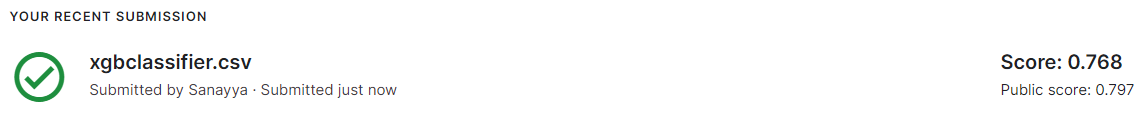

In [41]:
print("Kaggle Score For XGB Classifier Submission")
Image('./xgbclassifier.png',width=800,height=100)

### 6.5 AdaBoost Classifier

In [11]:
# Reference: https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostClassifier.html
# import AdaBoostClassifier 
from sklearn.ensemble import AdaBoostClassifier 
# dictionary of hyper parameters
parameters = {'n_estimators': [3,5,11,25,45,55,85,101],'learning_rate': [0.001,0.01,0.1,1,10,100,1000]}
# insance of AdaBoostClassifier model
clf = AdaBoostClassifier()
# call CrossValidationandHyperparameterTuning function
ada_clf = CrossValidationandHyperparameterTuning(clf,parameters)

In [12]:
# dictionary of all the evaluation metrics from the gridsearch
ada_results = pd.DataFrame.from_dict(ada_clf.cv_results_)
print("Shape of Resultant Dataset:",ada_results.shape)
ada_results.head()

Shape of Resultant Dataset: (56, 212)


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_rate,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,...,split92_train_score,split93_train_score,split94_train_score,split95_train_score,split96_train_score,split97_train_score,split98_train_score,split99_train_score,mean_train_score,std_train_score
0,0.037417,0.007897,0.006652,0.007703,0.001,3,"{'learning_rate': 0.001, 'n_estimators': 3}",0.652778,0.670139,0.461806,...,0.691358,0.685571,0.69483,0.681713,0.697531,0.682099,0.69483,0.703704,0.691080,0.011062
1,0.056293,0.007975,0.006422,0.007039,0.001,5,"{'learning_rate': 0.001, 'n_estimators': 5}",0.652778,0.670139,0.461806,...,0.691358,0.685571,0.69483,0.681713,0.697531,0.723422,0.69483,0.703704,0.692175,0.012322
2,0.120483,0.016473,0.008225,0.006074,0.001,11,"{'learning_rate': 0.001, 'n_estimators': 11}",0.652778,0.670139,0.461806,...,0.691358,0.685571,0.69483,0.681713,0.697531,0.723422,0.69483,0.703704,0.692269,0.012331
3,0.244078,0.008096,0.009693,0.007321,0.001,25,"{'learning_rate': 0.001, 'n_estimators': 25}",0.652778,0.670139,0.461806,...,0.691358,0.685571,0.69483,0.681713,0.697531,0.723422,0.69483,0.703704,0.695442,0.014887
4,0.434110,0.007931,0.012931,0.005957,0.001,45,"{'learning_rate': 0.001, 'n_estimators': 45}",0.652778,0.670139,0.461806,...,0.691358,0.685571,0.69483,0.681713,0.697531,0.723422,0.69483,0.703704,0.697954,0.017376


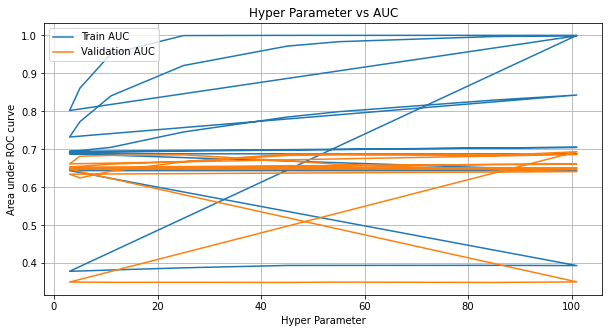

In [13]:
# plot Hyper parameter vs AUC
HyperparameterVSAucPlot(ada_results,"param_n_estimators")

In [14]:
# print best parameters
# here we are choosing the best n_estimators and max_depth
best_params = ada_clf.best_params_
print("For AdaBoost Classifier Classifier Model")
print("Best parameters:",best_params)

For AdaBoost Classifier Classifier Model
Best parameters: {'learning_rate': 1, 'n_estimators': 101}


In [15]:
# Reference: https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.RFE.html
# fit model on training data
ada_clf = AdaBoostClassifier(learning_rate=best_params["learning_rate"],n_estimators=best_params["n_estimators"])
ada_clf.fit(X_train,y_train)
# fit and feature ranking with recursive feature elimination.
ada = RFE(ada_clf,n_features_to_select=200)
ada.fit(X_train,y_train)
target = ada.predict_proba(test)

In [16]:
# Kaggle Submission Score 
ada_id = test_df['id']
ada_target = target[:,1]
ada_df = pd.DataFrame(np.column_stack((ada_id,ada_target)), columns=['id','target'])
ada_df['id'] = ada_df['id'].astype('int32')
ada_df.to_csv('adaboost.csv', index=False)

Kaggle Score For AdaBoost Submission


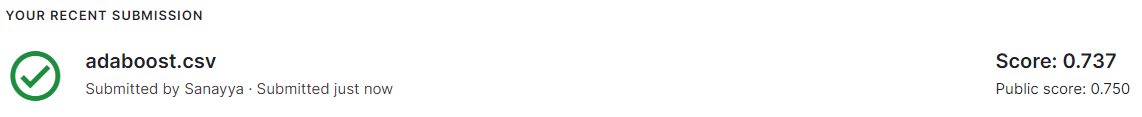

In [73]:
print("Kaggle Score For AdaBoost Submission")
Image('./adaboost.png',width=800,height=100)

### 6.6 LASSO

In [11]:
# Reference: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html
# import Lasso
from sklearn.linear_model import Lasso 
# dictionary of hyper parameters
parameters = {'alpha':[0.05,0.1,0.3,1,3,5,10,15,30,50,75]}
# insance of Lasso model
clf = Lasso()
# call CrossValidationandHyperparameterTuning function
lasso_clf = CrossValidationandHyperparameterTuning(clf,parameters)

In [12]:
# dictionary of all the evaluation metrics from the gridsearch
lasso_results = pd.DataFrame.from_dict(lasso_clf.cv_results_)
print("Shape of Resultant Dataset:",lasso_results.shape)
lasso_results.head()

Shape of Resultant Dataset: (11, 211)


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,split92_train_score,split93_train_score,split94_train_score,split95_train_score,split96_train_score,split97_train_score,split98_train_score,split99_train_score,mean_train_score,std_train_score
0,0.011392,0.008255,0.006186,0.007332,0.05,{'alpha': 0.05},0.895833,0.840278,0.736111,0.909722,...,0.924640,0.940844,0.937329,0.933128,0.939729,0.946331,0.949246,0.926012,0.935825,0.007418
1,0.008720,0.007552,0.006963,0.007339,0.1,{'alpha': 0.1},0.777778,0.868056,0.673611,0.909722,...,0.778035,0.794067,0.800154,0.796382,0.764232,0.785922,0.790466,0.798783,0.791053,0.014104
2,0.009568,0.007646,0.006811,0.007158,0.3,{'alpha': 0.3},0.500000,0.500000,0.500000,0.500000,...,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.000000
3,0.009283,0.007389,0.006918,0.007593,1,{'alpha': 1},0.500000,0.500000,0.500000,0.500000,...,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.000000
4,0.009595,0.007654,0.006975,0.007660,3,{'alpha': 3},0.500000,0.500000,0.500000,0.500000,...,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.000000


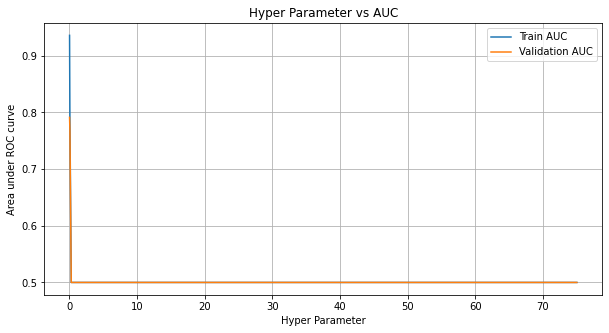

In [13]:
# plot Hyper parameter vs AUC
HyperparameterVSAucPlot(lasso_results,"param_alpha")

In [14]:
# print best parameters
# here we are choosing the best alpha
best_params = lasso_clf.best_params_
print("For Lasso Model")
print("Best parameters:",best_params)

For Lasso Model
Best parameters: {'alpha': 0.05}


In [15]:
# Reference: https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.RFE.html
# fit and calibrate model on training data
lasso_clf = Lasso(alpha=best_params["alpha"])
lasso_clf.fit(X_train,y_train)
# fit and feature ranking with recursive feature elimination.
lasso = RFE(lasso_clf,n_features_to_select=200)
lasso.fit(X_train,y_train)
target = lasso.predict(test)

In [57]:
# Kaggle Submission Score 
lasso_id = test_df['id']
lasso_target = target
lasso_df = pd.DataFrame(np.column_stack((lasso_id,lasso_target)), columns=['id','target'])
lasso_df['id'] = lasso_df['id'].astype('int32')
lasso_df.to_csv('lasso.csv', index=False)

Kaggle Score For Lasso Submission


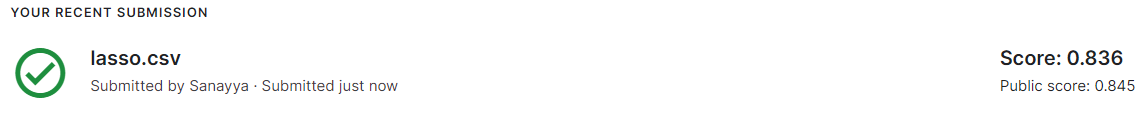

In [58]:
print("Kaggle Score For Lasso Submission")
Image('./lasso.png',width=800,height=100)

### 6.7 LassoCV

In [16]:
# Reference: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LassoCV.html
# Reference: https://medium.com/analytics-vidhya/just-dont-overfit-e2fddd28eb29
# import LassoCV
from sklearn.linear_model import LassoCV
lassocv = LassoCV(cv=5,alphas=[0.05, 0.1, 0.3, 1, 3, 5, 10, 15, 30, 50, 75])
# fit and calibrate model on training data
lassocv.fit(X_train,y_train)
target = lassocv.predict(test)

In [17]:
# Kaggle Submission Score 
lassocv_id = test_df['id']
lassocv_target = target
lassocv_df = pd.DataFrame(np.column_stack((lassocv_id,lassocv_target)), columns=['id','target'])
lassocv_df['id'] = lassocv_df['id'].astype('int32')
lassocv_df.to_csv('lassoCV.csv', index=False)

Kaggle Score For Lasso Submission


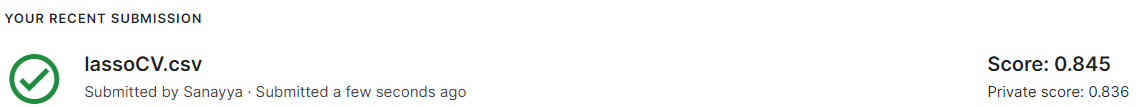

In [19]:
print("Kaggle Score For Lasso Submission")
Image('./lassoCV.png',width=800,height=100)

### 6.8 LassoLarsCV

In [18]:
# Reference: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LassoLarsCV.html
# import LassoLarsCV
from sklearn.linear_model import LassoLarsCV
lassolarscv = LassoLarsCV(cv=5)
# fit and calibrate model on training data
lassolarscv.fit(X_train,y_train)
target = lassolarscv.predict(test)

In [23]:
# Kaggle Submission Score 
lassolarscv_id = test_df['id']
lassolarscv_target = target
lassolarscv_df = pd.DataFrame(np.column_stack((lassolarscv_id,lassolarscv_target)), columns=['id','target'])
lassolarscv_df['id'] = lassolarscv_df['id'].astype('int32')
lassolarscv_df.to_csv('lassoLarsCV.csv', index=False)

Kaggle Score For Lasso Submission


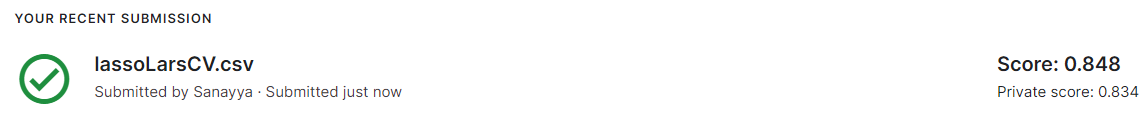

In [24]:
print("Kaggle Score For Lasso Submission")
Image('./lassoLarsCV.png',width=800,height=100)

### 6.9 Ensemble

In [13]:
#Model 1
# import Lasso
from sklearn.linear_model import Lasso 
lasso_clf = Lasso(alpha=0.05)
lasso_clf.fit(X_train,y_train)
# fit and feature ranking with recursive feature elimination.
lasso = RFE(lasso_clf,n_features_to_select=175)
clf1 = lasso.fit(X_train,y_train)
target1 = lasso.predict(test)
# Model 2
# import LassoCV
from sklearn.linear_model import LassoCV
# fit LassoCV model on training data
lassocv = LassoCV(cv=10,alphas=[0.05,0.1,0.3,1,3,5,10,15,30,50,75])
# fit and calibrate model on training data
clf2 = lassocv.fit(X_train,y_train)
target2 = lassocv.predict(test)
# Model 3
# import LassoLarsCV
from sklearn.linear_model import LassoLarsCV
# fit LassoLarsCV model on training data
lassolarscv = LassoLarsCV(cv=10)
# fit and calibrate model on training data
clf3 = lassolarscv.fit(X_train,y_train)
target3 = lassolarscv.predict(test)

target = (target1*0.2+target2*0.4+target3*0.4)

filename = "bestmodel.sav"
modellist = [clf1, clf2, clf3]
s = pickle.dump(modellist, open(filename, 'wb'))

In [14]:
# Kaggle Submission Score 
ensemble_id = test_df['id']
ensemble_target = target
ensemble_df = pd.DataFrame(np.column_stack((ensemble_id,ensemble_target)), columns=['id','target'])
ensemble_df['id'] = ensemble_df['id'].astype('int32')
ensemble_df.to_csv('ensemble.csv', index=False)

Kaggle Score For Ensemble Submission


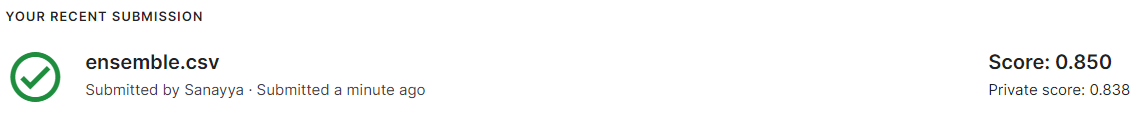

In [13]:
print("Kaggle Score For Ensemble Submission")
Image('./ensemble.png',width=800,height=100)

In [15]:
x = PrettyTable()
x.field_names = ['Rank','Model Name', 'Kaggle Private Ccore', 'Kaggle Public Score']
x.add_row([1,'Ensemble','0.850','0.838'])
x.add_row([2,'LassoLarsCV','0.848','0.834'])
x.add_row([3,'LassoCV','0.845','0.836'])
x.add_row([4,'Lasso', '0.836', '0.845'])
x.add_row([5,'XGBoost','0.768','0.797'])
x.add_row([6,'LGBM','0.758','0.784'])
x.add_row([7,'AdaBoost Classifier', '0.737', '0.750'])
x.add_row([8,'Random Forest Classifier','0.737','0.745'])
x.add_row([9,'Logistic Regression','0.705','0.743'])
print(x)

+------+--------------------------+----------------------+---------------------+
| Rank |        Model Name        | Kaggle Private Ccore | Kaggle Public Score |
+------+--------------------------+----------------------+---------------------+
|  1   |         Ensemble         |        0.850         |        0.838        |
|  2   |       LassoLarsCV        |        0.848         |        0.834        |
|  3   |         LassoCV          |        0.845         |        0.836        |
|  4   |          Lasso           |        0.836         |        0.845        |
|  5   |         XGBoost          |        0.768         |        0.797        |
|  6   |           LGBM           |        0.758         |        0.784        |
|  7   |   AdaBoost Classifier    |        0.737         |        0.750        |
|  8   | Random Forest Classifier |        0.737         |        0.745        |
|  9   |   Logistic Regression    |        0.705         |        0.743        |
+------+--------------------

LeaderBoard Score:


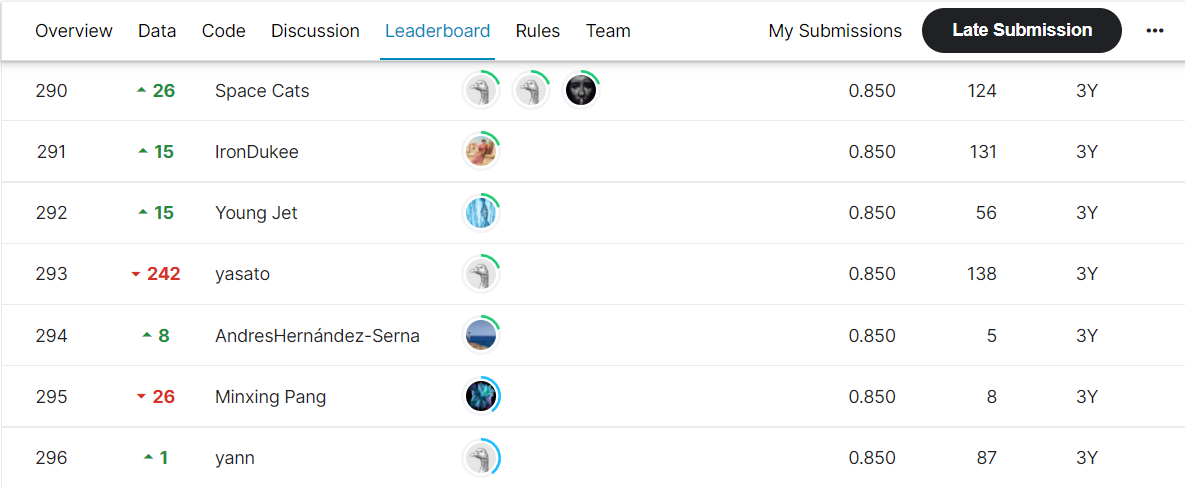

In [11]:
print("LeaderBoard Score:")
Image('./leaderboardscore.png',width=800,height=100)

Our Score Lies in the top 12% of the leaderboard!